In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### https://www.kaggle.com/datasets/franoisgeorgesjulien/crypto?select=Binance_TRXUSDT_1h+%281%29.csv

In [18]:
data = pd.read_csv('/kaggle/input/crypto/Binance_TRXUSDT_1h (1).csv')

In [19]:
data

,Date,Symbol,Open,High,Low,Close,Volume TRX,Volume USDT,tradecount
0,2023-10-19 23:00:00,TRXUSDT,0.08973,0.08999,0.08972,0.08999,8190976.1,736312.634307,2492
1,2023-10-19 22:00:00,TRXUSDT,0.08952,0.08984,0.08950,0.08973,6786724.1,609022.852877,1909
2,2023-10-19 21:00:00,TRXUSDT,0.08962,0.08972,0.08949,0.08953,6294905.2,563880.969352,2200
3,2023-10-19 20:00:00,TRXUSDT,0.08960,0.08977,0.08950,0.08962,7717630.4,691766.849803,2395
4,2023-10-19 19:00:00,TRXUSDT,0.08963,0.08966,0.08950,0.08960,5011515.9,448808.503893,1843
...,...,...,...,...,...,...,...,...,...
39616,2018-06-11 15:00:00,TRXUSDT,0.04591,0.04618,0.04258,0.04493,12761075.5,571930.183595,942
39617,2018-06-11 14:00:00,TRXUSDT,0.04662,0.04662,0.04520,0.04591,6530794.1,300329.695354,528
39618,2018-06-11 13:00:00,TRXUSDT,0.04723,0.04726,0.04649,0.04662,2663472.8,124633.298415,289
39619,2018-06-11 12:00:00,TRXUSDT,0.04787,0.04830,0.04650,0.04737,3581174.3,169524.216545,378


In [20]:
data.isnull().sum()

Date           0
Symbol         0
Open           0
High           0
Low            0
Close          0
Volume TRX     0
Volume USDT    0
tradecount     0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39621 entries, 0 to 39620
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         39621 non-null  object 
 1   Symbol       39621 non-null  object 
 2   Open         39621 non-null  float64
 3   High         39621 non-null  float64
 4   Low          39621 non-null  float64
 5   Close        39621 non-null  float64
 6   Volume TRX   39621 non-null  float64
 7   Volume USDT  39621 non-null  float64
 8   tradecount   39621 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 2.7+ MB


In [22]:
data['Date'] = data['Date'].apply(lambda x: x[11:13]).astype(np.int)
data = data.drop('Symbol',axis=1)

/tmp/ipykernel_32/259432397.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Date'] = data['Date'].apply(lambda x: x[11:13]).astype(np.int)


<Axes: >

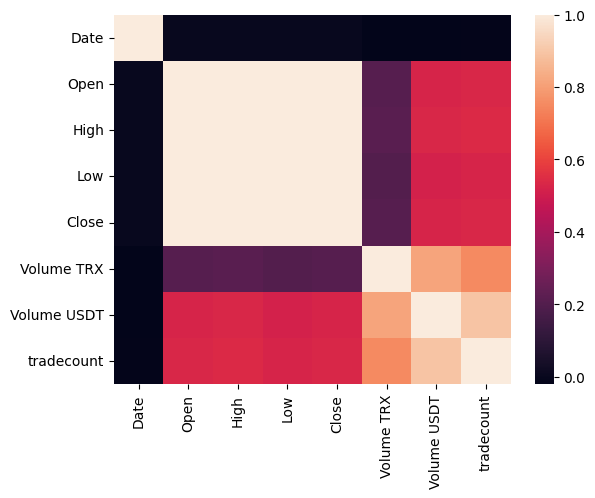

In [29]:
sns.heatmap(data.corr())

In [23]:
y = data['Close']
x = data.drop('Close',axis=1)

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.7 , random_state=13)

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
print('R2 Score',r2_score(predict,y_test))

R2 Score 0.9999146789249347


R2 Score 0.9999146789249347
